<a href="https://colab.research.google.com/github/sunnykr9012/iphone.shop/blob/main/AMZN_stocks_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd
import numpy as np
import yfinance as yf

In [35]:
df=yf.download('AMZN',
               start='2000-01-01',
               end='2023-03-07',
               progress=False)

In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


In [37]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52008400


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5830 entries, 2000-01-03 to 2023-03-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5830 non-null   float64
 1   High       5830 non-null   float64
 2   Low        5830 non-null   float64
 3   Close      5830 non-null   float64
 4   Adj Close  5830 non-null   float64
 5   Volume     5830 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.8 KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5.830000e+03
mean,34.774501,35.186703,34.320318,34.760941,34.760941,1.240678e+08
std,49.560918,50.143487,48.908104,49.522477,49.522477,9.915444e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.204469,2.251375,2.172125,2.219625,2.219625,6.807722e+07
50%,9.430500,9.540000,9.275750,9.414000,9.414000,1.016460e+08
75%,47.628249,47.891126,47.195002,47.602751,47.602751,1.480240e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [40]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

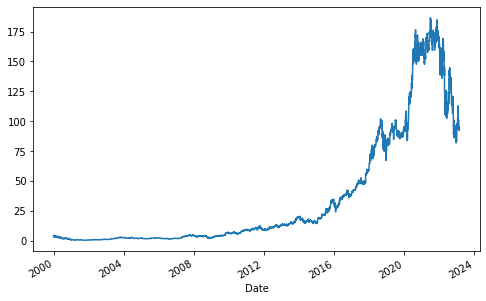

In [41]:
df['Close'].plot(figsize=(8,5))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

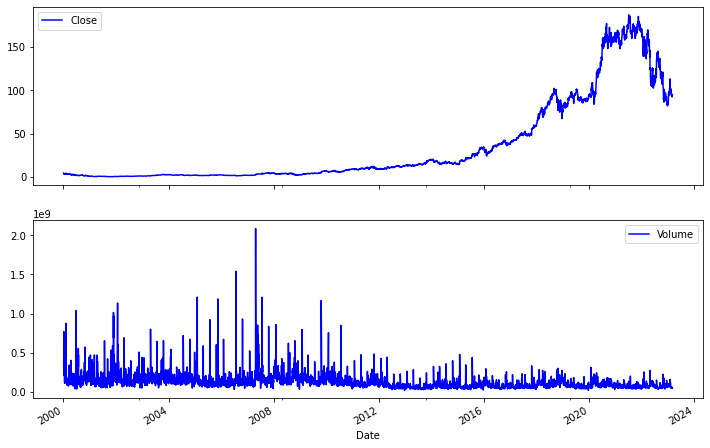

In [42]:
df[['Close','Volume']].plot(subplots=True,style='b',
                            figsize=(12,8))

In [43]:
df=pd.DataFrame(df)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000
...,...,...,...,...,...,...
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400


In [44]:
df['simple_log']=df.Close.pct_change()

In [45]:
df['simple_log']

Date
2000-01-03         NaN
2000-01-04   -0.083217
2000-01-05   -0.148741
2000-01-06   -0.060036
2000-01-07    0.061010
                ...   
2023-02-28    0.005013
2023-03-01   -0.021861
2023-03-02   -0.000434
2023-03-03    0.030066
2023-03-06   -0.012118
Name: simple_log, Length: 5830, dtype: float64

In [46]:
df['log_rtn']=np.log(df.Close/df.Close.shift(1))

<AxesSubplot:xlabel='Date'>

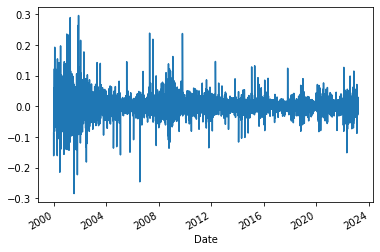

In [47]:
df['log_rtn'].plot()

<AxesSubplot:xlabel='Date'>

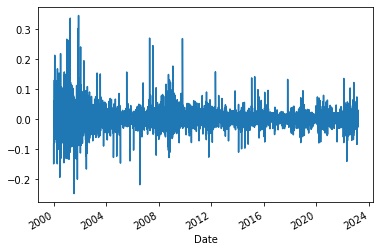

In [48]:
df['simple_log'].plot()

<AxesSubplot:xlabel='Date'>

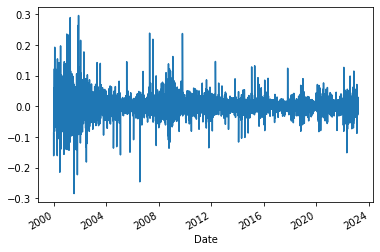

In [49]:
df['log_rtn'].plot()

In [50]:
df['vlog_rtn']=np.log(df.Volume/df.Volume.shift(1))
df['vlog_rtn']

Date
2000-01-03         NaN
2000-01-04    0.081569
2000-01-05    0.788071
2000-01-06   -0.718251
2000-01-07   -0.579411
                ...   
2023-02-28   -0.076840
2023-03-01    0.173723
2023-03-02    0.059566
2023-03-03    0.003343
2023-03-06   -0.068491
Name: vlog_rtn, Length: 5830, dtype: float64

In [51]:
df.dropna(how='any',axis=0,inplace=True)

In [52]:
corr_coeff=df.log_rtn.corr(df.vlog_rtn)
corr_coeff

0.08188444420593453

In [53]:
import seaborn as sns

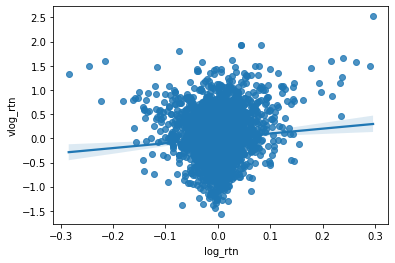

In [54]:
corr_coeff=df.log_rtn.corr(df.vlog_rtn)
ax=sns.regplot(x='log_rtn',y='vlog_rtn',data=df)

In [57]:
df['simple_rtn']=df.Close.pct_change()

In [58]:
df['vsimple_rtn']=df.Volume.pct_change()

In [59]:
corr_coeff=df.log_rtn.corr(df.simple_rtn)
corr_coeff

0.9981697873156598

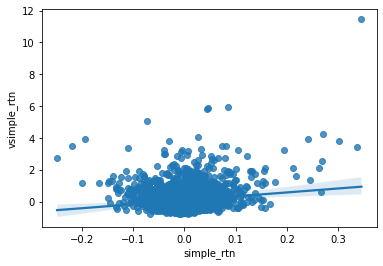

In [60]:
corr_coeff=df.log_rtn.corr(df.simple_rtn)
ax=sns.regplot(x='simple_rtn',y='vsimple_rtn',data=df)